Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3072)           │       789,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 32, 32, 3)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,609,602 (6.14 MB)

 Trainable params: 1,609,602 (6.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0493 - val_loss: 0.0370
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0372 - val_loss: 0.0366
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0369 - val_loss: 0.0361
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0366 - val_loss: 0.0356
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0361 - val_loss: 0.0354
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0357 - val_loss: 0.0352
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0355 - val_loss: 0.0348
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0352 - val_loss: 0.0351
Epoch 9/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0351 - val_loss: 0.0344
Epoch 10/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0350 - val_loss: 0.0343
Epoch 11/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0347 - val_loss: 0.0342
Epoch 12/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/ste

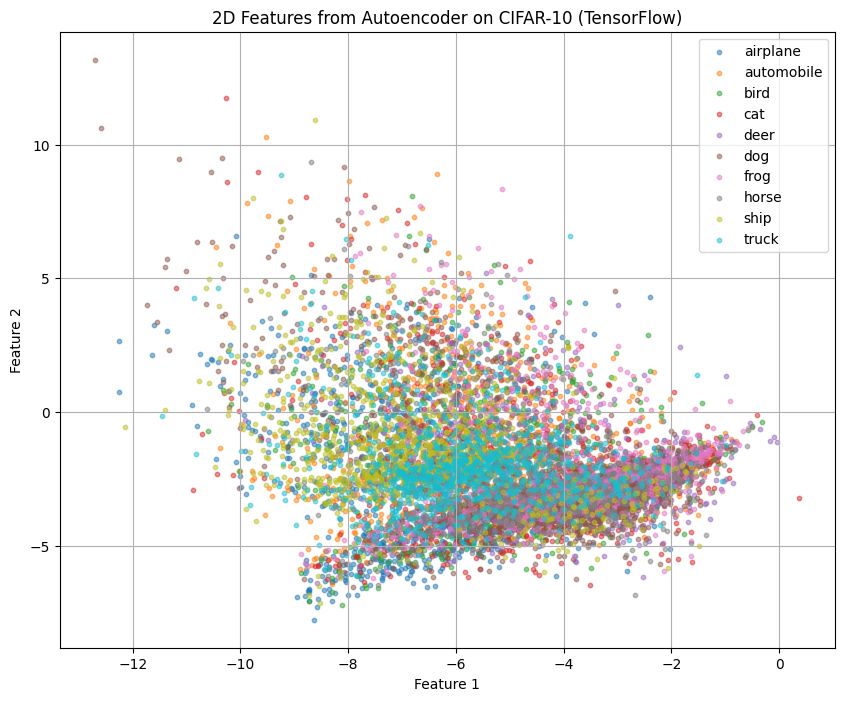

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
y_train = y_train.flatten()
y_test = y_test.flatten()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

input_img = layers.Input(shape=(32, 32, 3))
x = layers.Flatten()(input_img)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
encoded = layers.Dense(2)(x)

x = layers.Dense(64, activation='relu')(encoded)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(32 * 32 * 3, activation='sigmoid')(x)
decoded = layers.Reshape((32, 32, 3))(x)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                validation_split=0.1)

features_2d = encoder.predict(x_test)

plt.figure(figsize=(10, 8))
for i in range(10):
    idxs = (y_test == i)
    plt.scatter(features_2d[idxs, 0], features_2d[idxs, 1],
                label=class_names[i], alpha=0.5, s=10)
plt.legend()
plt.title("2D Features from Autoencoder on CIFAR-10 (TensorFlow)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step


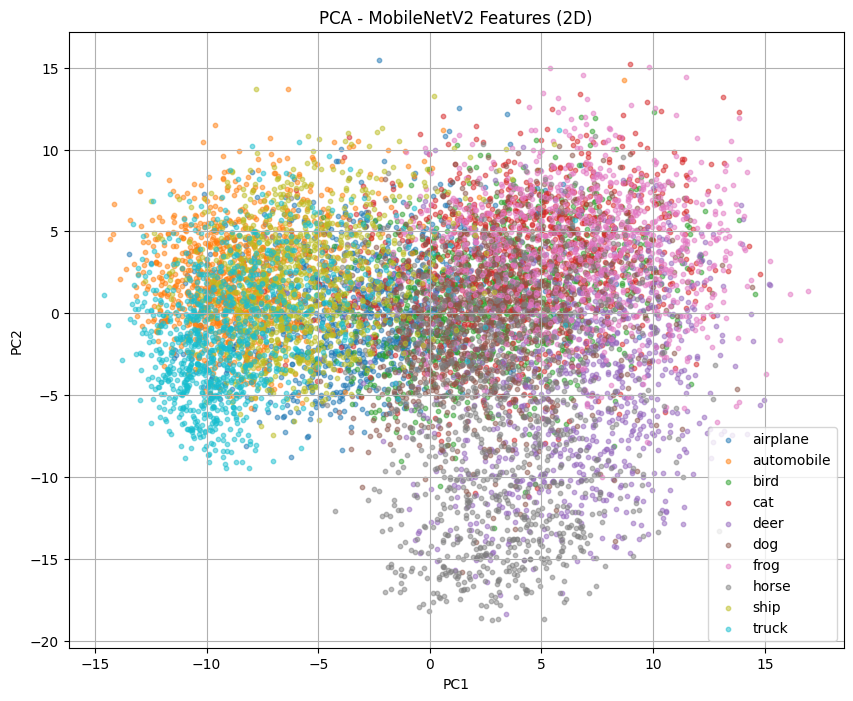

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


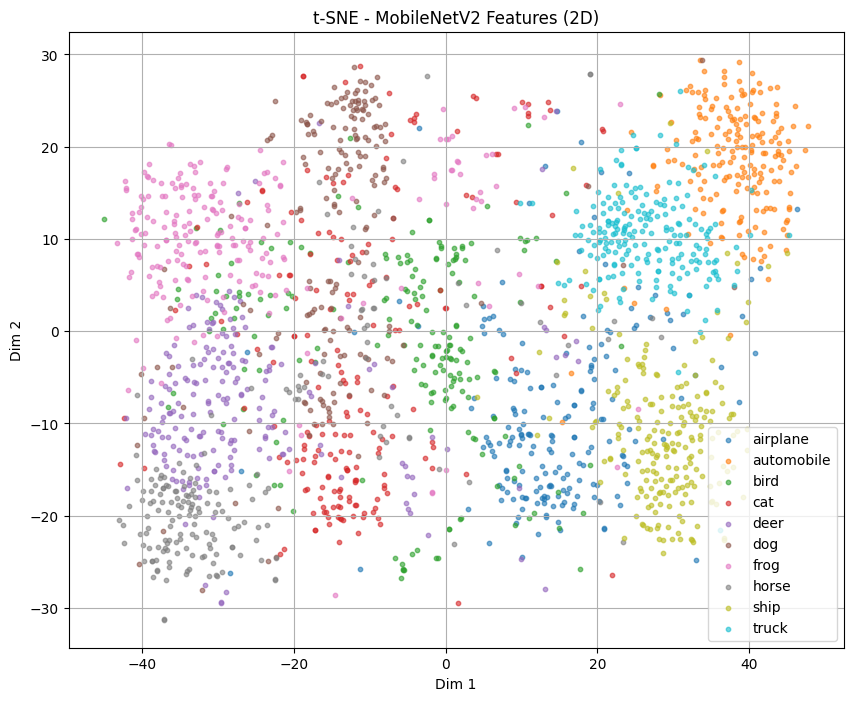

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_test = y_test.flatten()

IMG_SIZE = 96

def preprocess_images(images):
    images_resized = np.zeros((images.shape[0], IMG_SIZE, IMG_SIZE, 3), dtype=np.float32)
    for i, img in enumerate(images):
        img_resized = tf.image.resize(img, (IMG_SIZE, IMG_SIZE)).numpy()
        images_resized[i] = img_resized
    return preprocess_input(images_resized)

x_test_processed = preprocess_images(x_test)

base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

feature_extractor = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D()
])

features = feature_extractor.predict(x_test_processed, batch_size=64, verbose=1)

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

plt.figure(figsize=(10, 8))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(10):
    idxs = (y_test == i)
    plt.scatter(features_pca[idxs, 0], features_pca[idxs, 1], label=class_names[i], alpha=0.5, s=10)
plt.legend()
plt.title('PCA - MobileNetV2 Features (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

subset_size = 2000
features_subset = features[:subset_size]
labels_subset = y_test[:subset_size]

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
features_tsne = tsne.fit_transform(features_subset)

plt.figure(figsize=(10, 8))
for i in range(10):
    idxs = (labels_subset == i)
    plt.scatter(features_tsne[idxs, 0], features_tsne[idxs, 1], label=class_names[i], alpha=0.6, s=10)
plt.legend()
plt.title('t-SNE - MobileNetV2 Features (2D)')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.grid(True)
plt.show()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3072)           │       789,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 32, 32, 3)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,613,472 (6.15 MB)

 Trainable params: 1,613,472 (6.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0442 - val_loss: 0.0245
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0232 - val_loss: 0.0216
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0214 - val_loss: 0.0204
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0203 - val_loss: 0.0199
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0196 - val_loss: 0.0193
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0191 - val_loss: 0.0192
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0191 - val_loss: 0.0192
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0189 - val_loss: 0.0190
Epoch 9/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0187 - val_loss: 0.0185
Epoch 10/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0183 - val_loss: 0.0183
Epoch 11/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0182 - val_loss: 0.0188
Epoch 12/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/ste

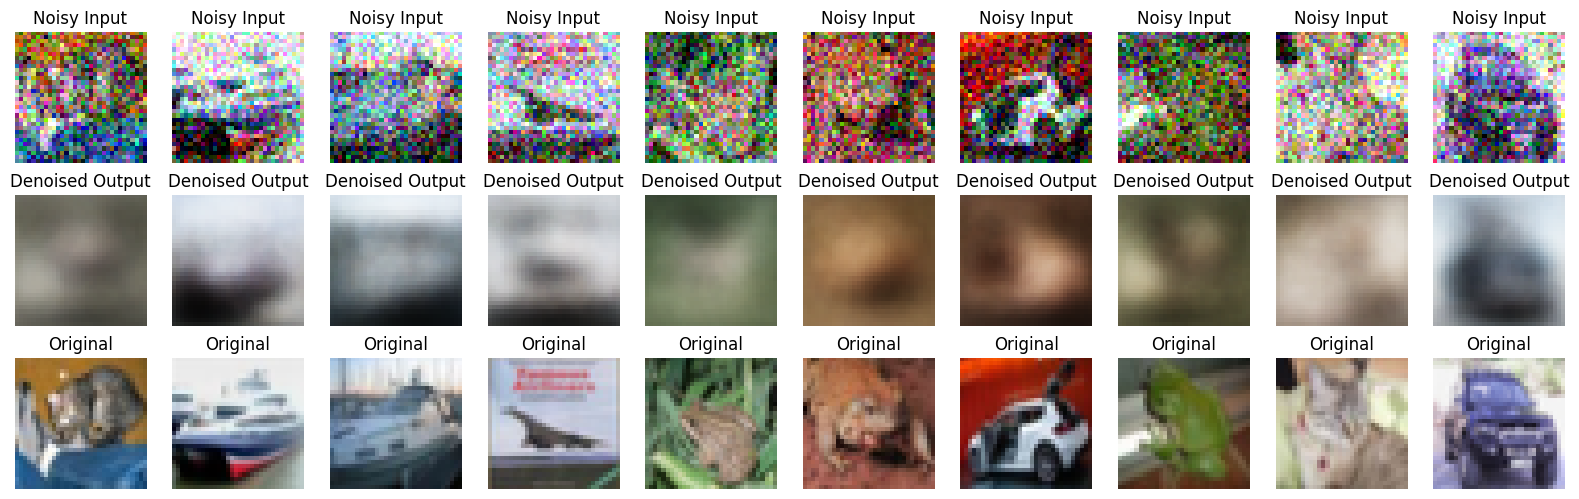

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

input_img = layers.Input(shape=(32, 32, 3))
x = layers.Flatten()(input_img)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
encoded = layers.Dense(32, activation='relu')(x)

x = layers.Dense(64, activation='relu')(encoded)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(32 * 32 * 3, activation='sigmoid')(x)
decoded = layers.Reshape((32, 32, 3))(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))

decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy Input")
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Denoised Output")
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.3358 - loss: 1.7959 - val_accuracy: 0.5857 - val_loss: 1.1499
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.5830 - loss: 1.1715 - val_accuracy: 0.6616 - val_loss: 0.9531
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6549 - loss: 0.9808 - val_accuracy: 0.7073 - val_loss: 0.8297
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6969 - loss: 0.8589 - val_accuracy: 0.7329 - val_loss: 0.7811
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7276 - loss: 0.7682 - val_accuracy: 0.7386 - val_loss: 0.7584
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7481 - loss: 0.7100 - val_accuracy: 0.7615 - val_loss: 0.6955
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7707 - loss: 0.6540 - val_accuracy: 0.7623 - val_loss: 0.6894
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7846 - loss: 0.6122 - val_accu

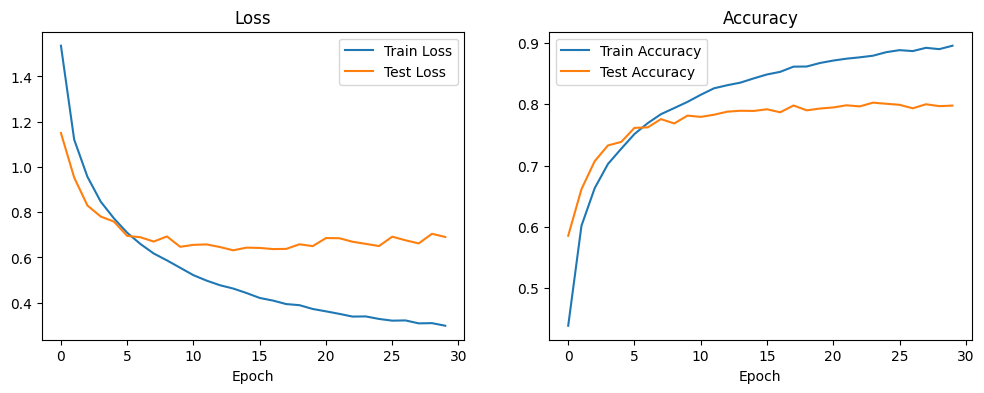

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = build_cnn()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train_cat,
                    batch_size=64,
                    epochs=30,
                    validation_data=(x_test, y_test_cat))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.3021 - loss: 1.8834 - val_accuracy: 0.5486 - val_loss: 1.2389
Epoch 2/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5156 - loss: 1.3353

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5156 - loss: 1.3353 - val_accuracy: 0.5491 - val_loss: 1.2441
Epoch 3/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 73s 44ms/step - accuracy: 0.5147 - loss: 1.3520 - val_accuracy: 0.6031 - val_loss: 1.1079
Epoch 4/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5781 - loss: 1.1602

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5781 - loss: 1.1602 - val_accuracy: 0.5891 - val_loss: 1.1599
Epoch 5/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.5673 - loss: 1.2026 - val_accuracy: 0.6513 - val_loss: 0.9880
Epoch 6/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5625 - loss: 1.1186

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5625 - loss: 1.1186 - val_accuracy: 0.6528 - val_loss: 0.9848
Epoch 7/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.6087 - loss: 1.1089 - val_accuracy: 0.6616 - val_loss: 0.9514
Epoch 8/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7031 - loss: 0.9386

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7031 - loss: 0.9386 - val_accuracy: 0.6517 - val_loss: 0.9778
Epoch 9/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6401 - loss: 1.0178 - val_accuracy: 0.6727 - val_loss: 0.9424
Epoch 10/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6875 - loss: 1.0649

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6875 - loss: 1.0649 - val_accuracy: 0.6757 - val_loss: 0.9291
Epoch 11/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6525 - loss: 0.9878 - val_accuracy: 0.7168 - val_loss: 0.8228
Epoch 12/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6406 - loss: 0.9434

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6406 - loss: 0.9434 - val_accuracy: 0.7162 - val_loss: 0.8205
Epoch 13/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.6706 - loss: 0.9393 - val_accuracy: 0.7357 - val_loss: 0.7615
Epoch 14/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6875 - loss: 0.9316 - val_accuracy: 0.7295 - val_loss: 0.7751
Epoch 15/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6870 - loss: 0.9033 - val_accuracy: 0.7197 - val_loss: 0.7994
Epoch 16/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7656 - loss: 0.6694

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7656 - loss: 0.6694 - val_accuracy: 0.7184 - val_loss: 0.8042
Epoch 17/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.6921 - loss: 0.8750 - val_accuracy: 0.7313 - val_loss: 0.7565
Epoch 18/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6875 - loss: 0.8914

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6875 - loss: 0.8914 - val_accuracy: 0.7277 - val_loss: 0.7671
Epoch 19/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.6921 - loss: 0.8705 - val_accuracy: 0.7452 - val_loss: 0.7363
Epoch 20/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7656 - loss: 0.7596

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7656 - loss: 0.7596 - val_accuracy: 0.7464 - val_loss: 0.7392
Epoch 21/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.7055 - loss: 0.8388 - val_accuracy: 0.7515 - val_loss: 0.7215
Epoch 22/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6875 - loss: 1.0418

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6875 - loss: 1.0418 - val_accuracy: 0.7522 - val_loss: 0.7211
Epoch 23/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.7061 - loss: 0.8366 - val_accuracy: 0.7469 - val_loss: 0.7300
Epoch 24/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7812 - loss: 0.6469

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7812 - loss: 0.6469 - val_accuracy: 0.7502 - val_loss: 0.7186
Epoch 25/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.7122 - loss: 0.8248 - val_accuracy: 0.7469 - val_loss: 0.7529
Epoch 26/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6250 - loss: 1.0536

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6250 - loss: 1.0536 - val_accuracy: 0.7394 - val_loss: 0.7707
Epoch 27/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.7198 - loss: 0.8078 - val_accuracy: 0.7663 - val_loss: 0.6800
Epoch 28/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7031 - loss: 0.9590

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7031 - loss: 0.9590 - val_accuracy: 0.7586 - val_loss: 0.7047
Epoch 29/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.7202 - loss: 0.7981 - val_accuracy: 0.7563 - val_loss: 0.7113
Epoch 30/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7188 - loss: 0.7785

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7188 - loss: 0.7785 - val_accuracy: 0.7545 - val_loss: 0.7146


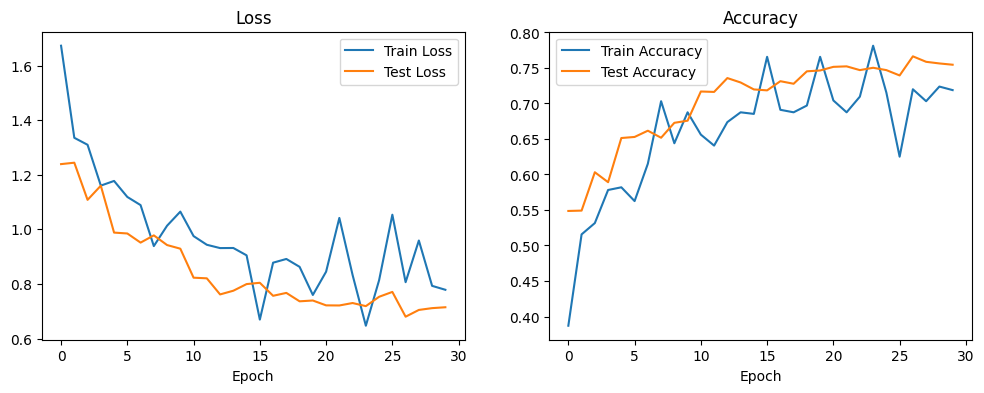

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = build_cnn()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(x_train)

batch_size = 64
epochs = 30

history = model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test_cat)
)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()
